## 1.0. Basic libraries used in this lecture
numpy - A library written in C/Fortran for fast array operations</br>
matplotlib - Used for displaying a 2d image on a plot (usefull while using IPython)</br>
OpenCV - A wrapper for a open source computer vision library written in C/C++</br>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2    

## 1.1. Reading images using OpenCV and displaying it 
Note: OpenCV stores images in an np.array,
so we if we want to use it, we need to also import numpy.

#### Why am I using this image?</br> Why is it common to find it in computer vision and computer graphics to meet it?
*"They wanted something glossy to ensure good output dynamic range, and they wanted a human face. Just then, somebody happened to walk in with a recent issue of Playboy. "* <br> https://en.wikipedia.org/wiki/Lenna

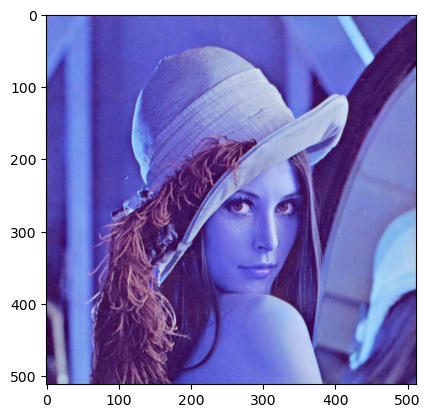

In [3]:
sample_img = cv2.imread("data/lenna.png")
assert sample_img is not None

plt.imshow(sample_img)

#### Why is the image so blue?
Pyplot displays images in RGB format so, it's the reason why does it look like this ^
We can fix it by converting the image to the required format.
#### Why does OpenCV use BGR format instead of something more common(RGB)?
BGR was a choice made for historical reasons and now we have to live with it. In other words, BGR is the horse’s ass in OpenCV. </br>
https://learnopencv.com/why-does-opencv-use-bgr-color-format/

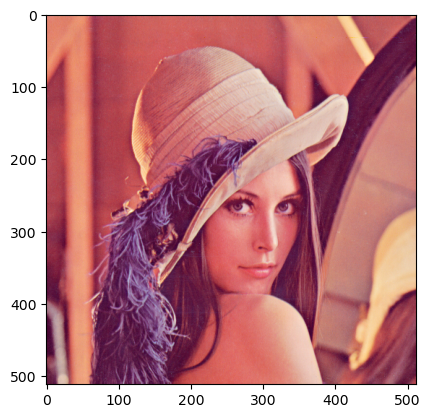

In [4]:
def show(img, flag=cv2.COLOR_BGR2RGB):
    plt.imshow(cv2.cvtColor(img, flag))
    plt.show()
show(sample_img)

## 1.2. Image color spaces in Computer Vision
As we spoke already, some use BGR(OpenCV), most of the people use RGB, but we can also use HSL or HSV for some advantages. HSV: H - hue, S - saturation, V - value. HSL: H - hue, S - saturation, L - lightness.
</br></br>
More about switching between color spaces below:</br>
https://docs.opencv.org/3.4/de/d25/imgproc_color_conversions.html

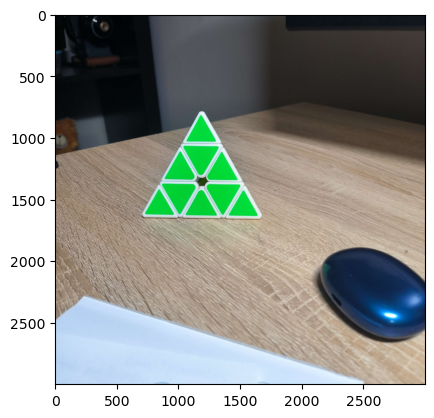

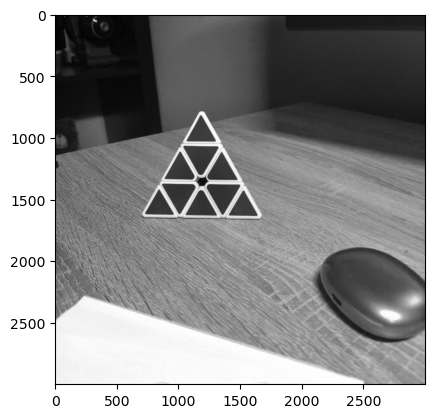

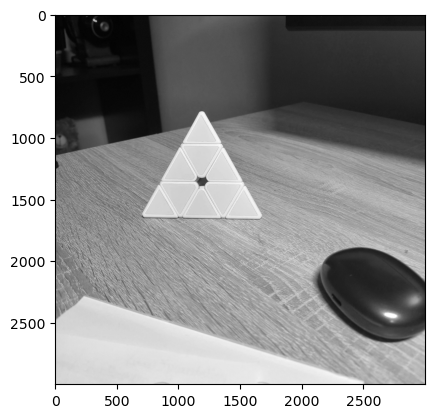

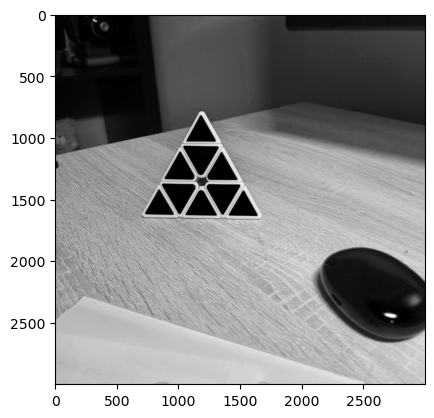

In [5]:
# we are changing the sample img here!
sample_img = cv2.imread("data/pyraminx.jpg")


# splitting RGB format into 3 separate channels
ch_g, ch_b, ch_r = cv2.split(sample_img)
show(sample_img)
show(ch_g)
show(ch_b)
show(ch_r)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


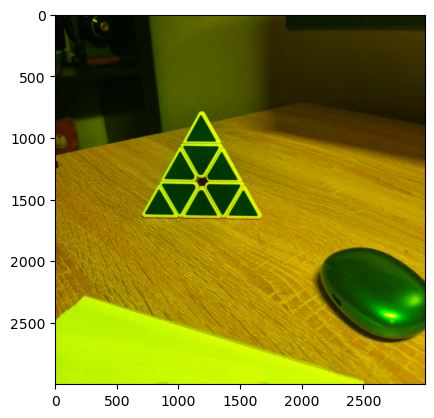

In [19]:
empty_ch = np.zeros_like(ch_b)
print(empty_ch)

rg_image = cv2.merge([empty_ch, ch_g, ch_r])
show(rg_image    )

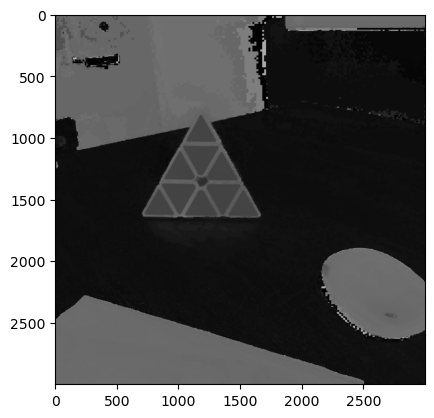

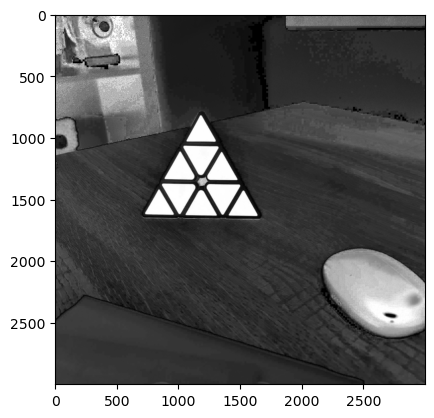

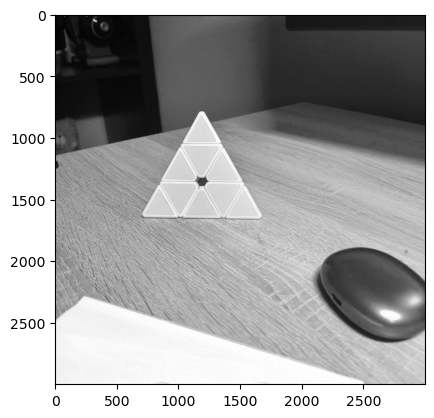

In [119]:
HSV_sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2HSV)
ch_h, ch_s, ch_v = cv2.split(HSV_sample_img)
show(ch_h)
show(ch_s)
show(ch_v)

## 1.4. Interpolations and transformations
Interpolations are used to get the values of "new" pixels. So it's used when we want to resize an image or transform it in some way(for instance - while rotating an image by an not an angle (different than the multitude of 90 degree angles)).

*Note*:
If you are *enlarging* the image, you should prefer to use *INTER_LINEAR or INTER_CUBIC* interpolation. If you are shrinking the image, you should prefer to use *INTER_AREA* interpolation.
*Cubic interpolation* is computationally more complex, and hence slower than linear interpolation. However, the quality of the resulting image will be higher.

#### Basic transformations:
- resizing, rotating, flipping,
- also affine transformation and perspective transformation.  (https://docs.opencv.org/4.x/da/d6e/tutorial_py_geometric_transformations.html)

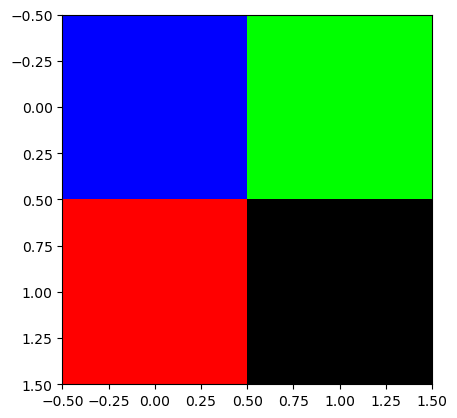

In [37]:
chessboard_image = np.zeros((2, 2, 3), dtype=np.uint8)
w, h = 2, 2
                                      # Color for the 
chessboard_image[0, 0] = [255, 0, 0]  # top-left corner (Blue)
chessboard_image[0, 1] = [0, 255, 0]  # top-right corner (Green)
chessboard_image[1, 0] = [0, 0, 255]  # bottom-left corner (Red)

show(chessboard_image)

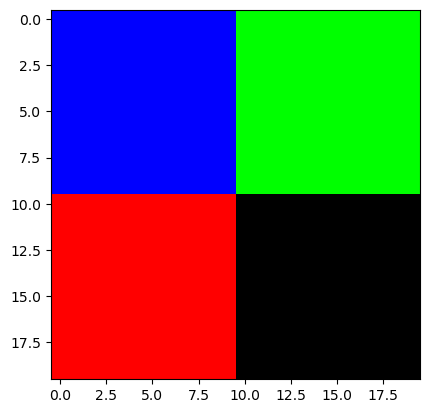

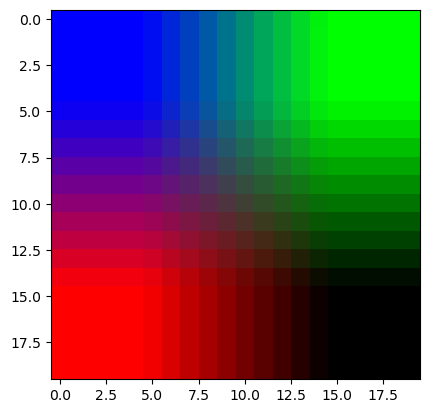

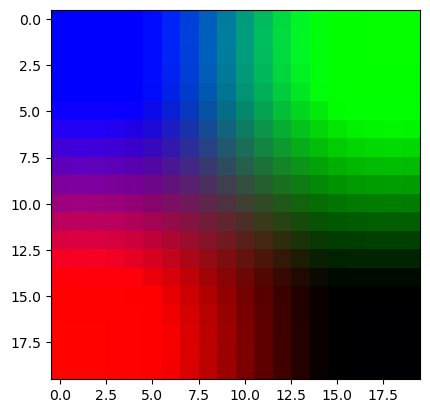

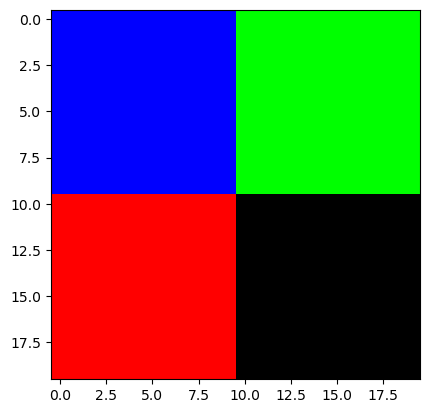

In [44]:
show(cv2.resize(chessboard_image, (w*10, h*10), interpolation = cv2.INTER_NEAREST))
show(cv2.resize(chessboard_image, (w*10, h*10), interpolation = cv2.INTER_LINEAR))
show(cv2.resize(chessboard_image, (w*10, h*10), interpolation = cv2.INTER_CUBIC))
show(cv2.resize(chessboard_image, (w*10, h*10), interpolation = cv2.INTER_AREA))

#### Why is INTER_AREA the same as INTER_NEAREST in upscaling?
Inter area is based on resampling using pixel area relation. It may be a preferred method for image decimation, as it gives moire'-free results. But when the image is zoomed, it is similar to the INTER_NEAREST method. </br>
Source: https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html

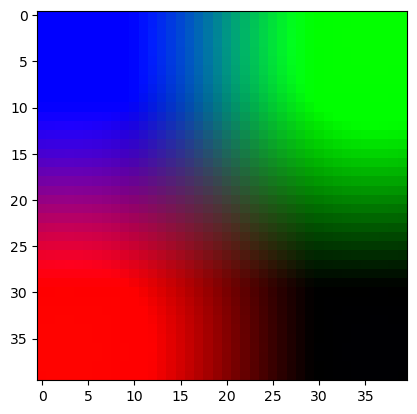

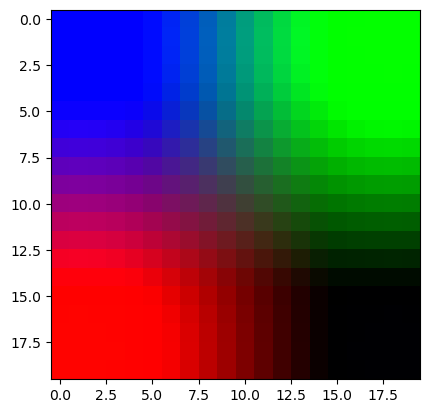

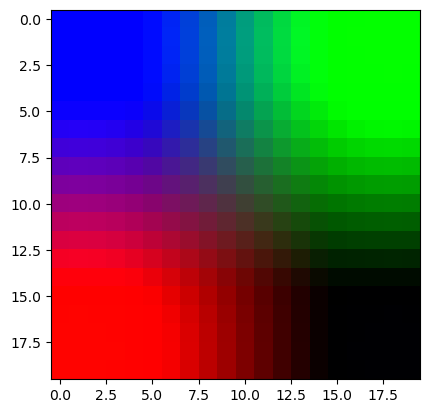

In [74]:
enlarged_image = cv2.resize(chessboard_image, (w*20, h*20), interpolation = cv2.INTER_CUBIC)
show(enlarged_image)

show(cv2.resize(enlarged_image, (w*10, h*10), interpolation = cv2.INTER_LINEAR))
show(cv2.resize(enlarged_image, (w*10, h*10), interpolation = cv2.INTER_AREA))

## 1.4. Eroding and Dilating
Two simple mechanics, especially usefull when we want to remove some noise, </br>or add more "thickness" to our results.
More about how does it work bellow:</br>
https://docs.opencv.org/3.4/db/df6/tutorial_erosion_dilatation.html


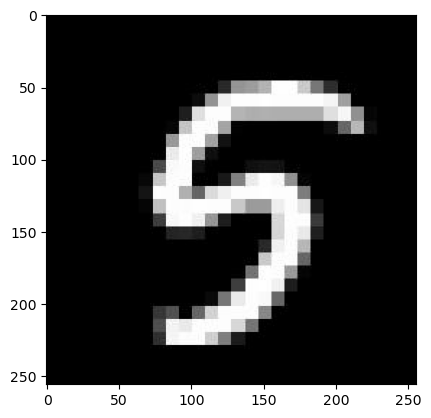

In [83]:
number_image = cv2.imread("data/mnist_number.jpeg")
show(number_image)

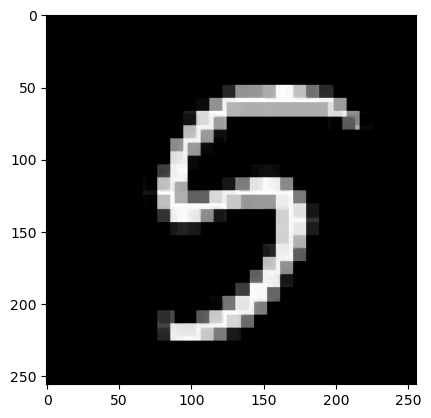

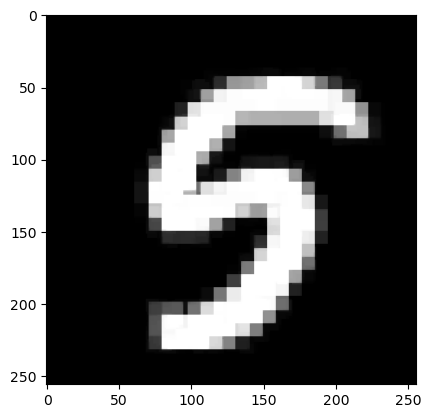

In [89]:
kernel = np.ones((7, 7), np.uint8) 
eroded_image = cv2.erode(number_image, kernel, iterations=1) 
dilated_image = cv2.dilate(number_image, kernel, iterations=1) 
show(eroded_image)
show(dilated_image)

## 1.3. Arithmetic and bitwise operations on images
Basic arithmetics and bitwise operations for images:
- adding, subtracting, multiplying,
- bitwise AND, OR.

## 1.3. Thresholds
Thresholds are a big topic in image processing, so more details can be found in the opencv documentation: <
https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

In [115]:
# tutaj pokazuje np. odejmując -30 od niebieskiego, następnie daję przykład inRange, a następnie logiczne and/or
# wytłumaczyć czym są thresholdy i pokazać na prezentacji
# https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html
# od razu powiedzieć o adaptive threshold i otsu bin

## Bonus: Usage of a simple threshold, bitwise opration, dilataion and erosion

#### Tools for color preparation(?)
Opencv has a lot of software like this simple script, but I couldn't find it so I used an edited version of this:</br>
https://medium.com/programming-fever/how-to-find-hsv-range-of-an-object-for-computer-vision-applications-254a8eb039fc

In [88]:
!python3 static_interactableTrackbar.py

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in ""


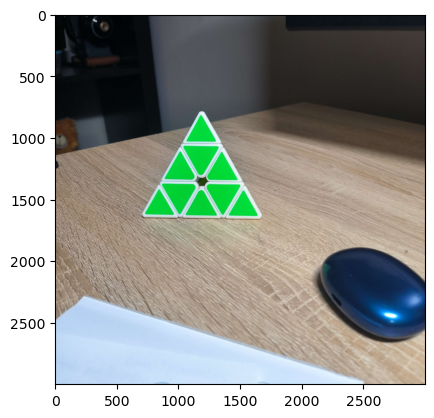

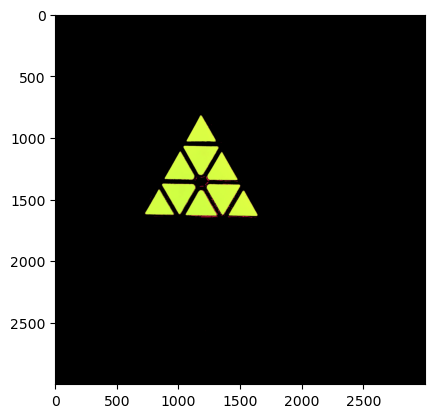

In [120]:
def colorRGB2HSV(color: np.array):
    return cv2.cvtColor(np.uint8([[color]]),cv2.COLOR_BGR2HSV).flatten()

lower_bound = np.array([37, 12, 188])
upper_bound = np.array([82, 255, 233])

# simple threshold
green_mask = cv2.inRange(HSV_sample_img, lower_bound, upper_bound)

# bitwise AND
obtained_image = cv2.bitwise_and(HSV_sample_img,HSV_sample_img, mask=green_mask)
show(cv2.imread("data/pyraminx.jpg"))
show(obtained_image)

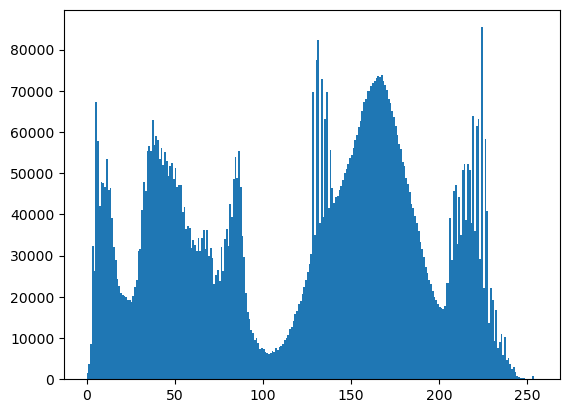

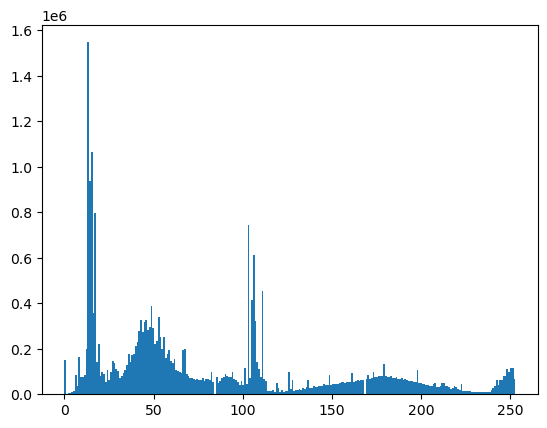

In [123]:
img = cv2.imread("data/pyraminx.jpg", cv2.IMREAD_GRAYSCALE)
plt.hist(img.ravel(),256,[0,256]);
plt.show()

img = cv2.cvtColor(HSV_sample_img, cv2.IMREAD_GRAYSCALE)
plt.hist(img.ravel(),256,[0,253]);   
# note that, the range is smaller, cause the image is mostly dark (255) and we don't need it for histogram look up
plt.show()